In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# download the Data and load


In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

take a look at data structure

In [4]:
train_data.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


# The info method is useful for quick description: the total number of rows, each attribute's type and number of non-null values

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


# the describe method shows a summary of the numerical attributes


In [6]:
train_data.describe()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.00000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,5203.00000,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,3004.38646,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2601.50000,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,5203.00000,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,7804.50000,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,10406.00000,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


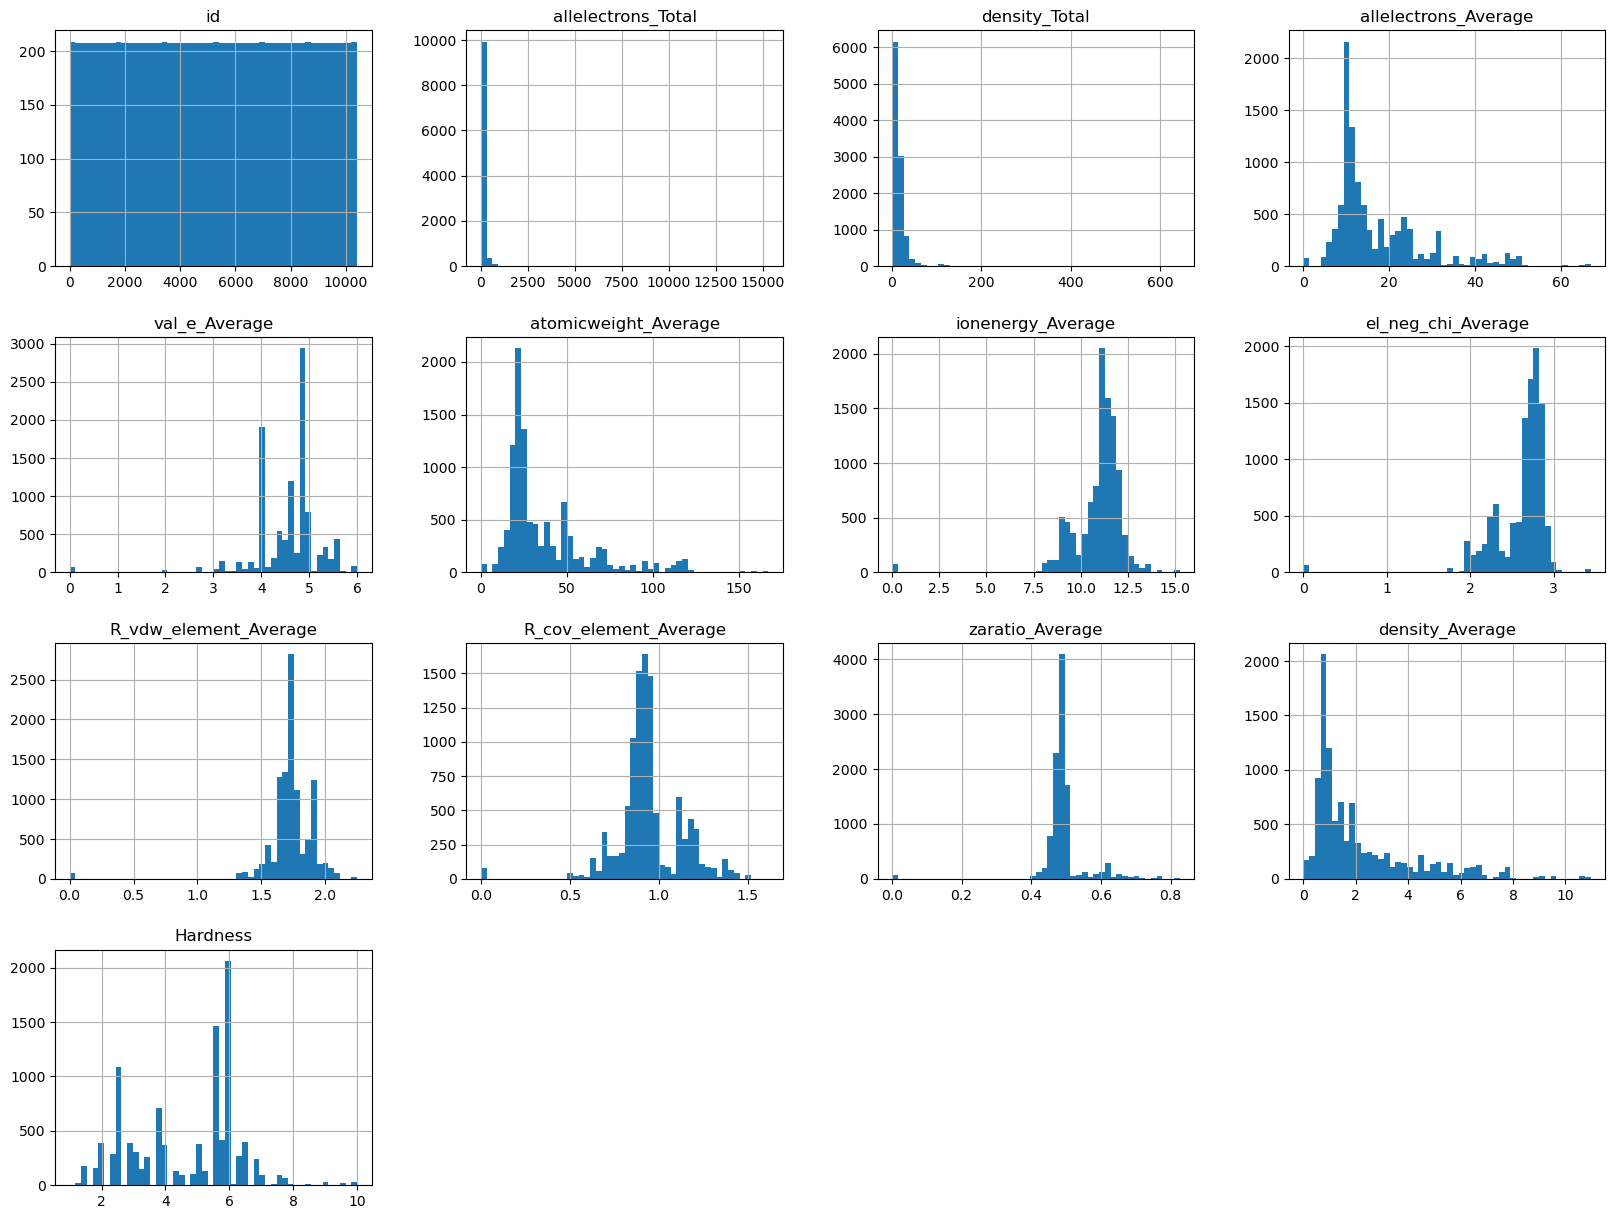

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins= 50, figsize=(20,15))
plt.show()

 Based on the histogram it's better to add a feature scaling to some features


## Get to know the data:
let's set aside  a copy of the training data so we can play with it without jarming the training set.

In [8]:
minerals = train_data.copy()

Let's play around

<Axes: xlabel='atomicweight_Average', ylabel='density_Average'>

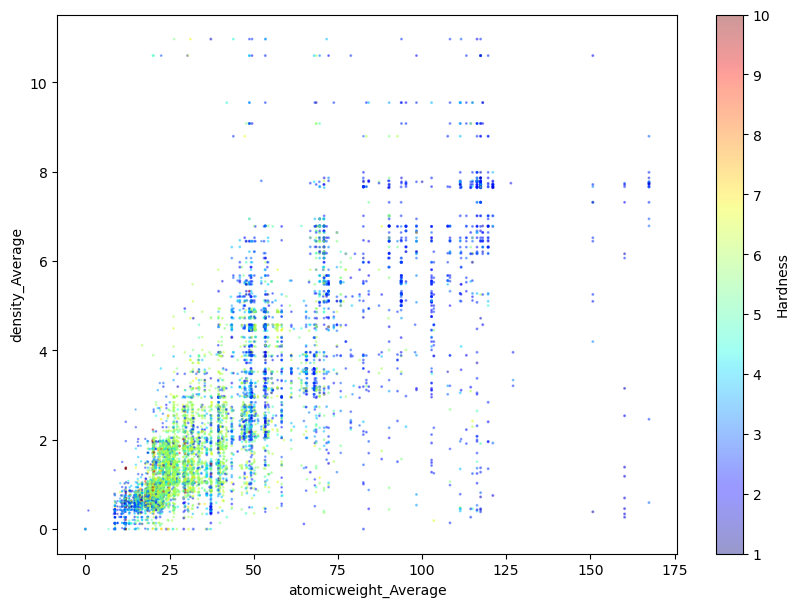

In [9]:
minerals.plot(kind="scatter", x="atomicweight_Average",y="density_Average", alpha =0.4,s = minerals["R_cov_element_Average"], figsize=(10,7), c="Hardness", cmap=plt.get_cmap("jet"),colorbar=True)

# Looking for correlations
since the dataset is not too large, you can easily compute the standard correlation coefficient as follows: 

In [10]:
corr_matrix = minerals.corr()
corr_matrix["Hardness"].sort_values(ascending=False)

Hardness                 1.000000
el_neg_chi_Average       0.290352
ionenergy_Average        0.203203
val_e_Average            0.161715
zaratio_Average          0.055248
id                      -0.006989
R_vdw_element_Average   -0.061402
allelectrons_Total      -0.061687
density_Total           -0.161524
R_cov_element_Average   -0.189111
density_Average         -0.360780
allelectrons_Average    -0.400496
atomicweight_Average    -0.402948
Name: Hardness, dtype: float64

## Another way tp check for correlation between attributes is to use pandas' scatter_matrix function, which plots every numerical attribute against every other numerical attribute.

since there ate 10 numerical attribute, you would get 10**2 = 100 plots.

array([[<Axes: xlabel='id', ylabel='id'>,
        <Axes: xlabel='allelectrons_Total', ylabel='id'>,
        <Axes: xlabel='density_Total', ylabel='id'>,
        <Axes: xlabel='allelectrons_Average', ylabel='id'>,
        <Axes: xlabel='val_e_Average', ylabel='id'>,
        <Axes: xlabel='atomicweight_Average', ylabel='id'>,
        <Axes: xlabel='ionenergy_Average', ylabel='id'>,
        <Axes: xlabel='el_neg_chi_Average', ylabel='id'>,
        <Axes: xlabel='R_vdw_element_Average', ylabel='id'>,
        <Axes: xlabel='R_cov_element_Average', ylabel='id'>,
        <Axes: xlabel='zaratio_Average', ylabel='id'>,
        <Axes: xlabel='density_Average', ylabel='id'>,
        <Axes: xlabel='Hardness', ylabel='id'>],
       [<Axes: xlabel='id', ylabel='allelectrons_Total'>,
        <Axes: xlabel='allelectrons_Total', ylabel='allelectrons_Total'>,
        <Axes: xlabel='density_Total', ylabel='allelectrons_Total'>,
        <Axes: xlabel='allelectrons_Average', ylabel='allelectrons_Total'>,
 

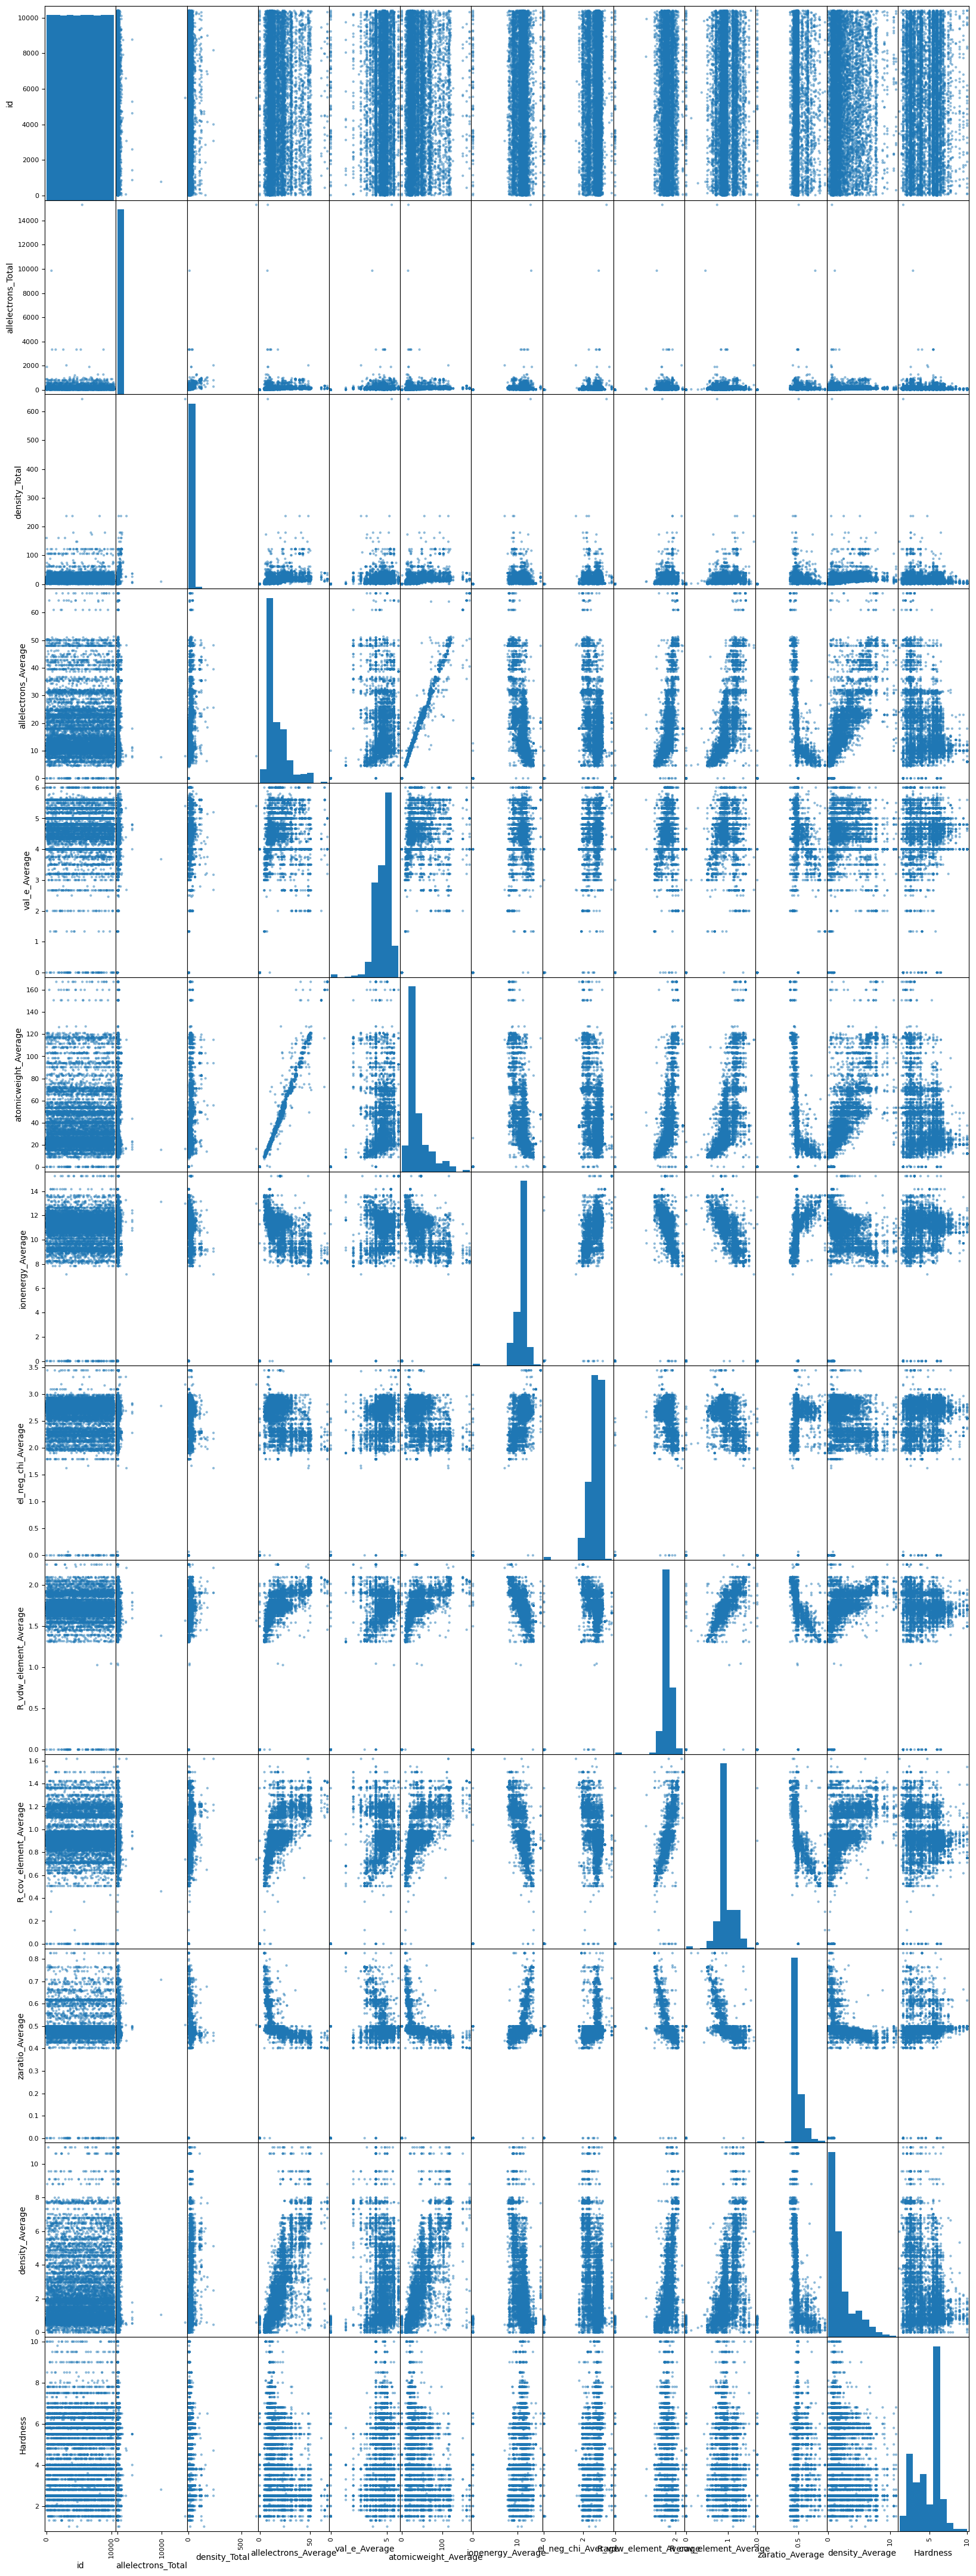

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(minerals, figsize=(20,55))

# Prepare the Data for Machine Learning Algorithms
It’s time to prepare the data for your Machine Learning algorithms. Instead of just
doing this manually, you should write functions to do that, for several good reasons:
### • This will allow you to reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset).
### • You will gradually build a library of transformation functions that you can reusein future projects.
### • You can use these functions in your live system to transform the new data before feeding it to your algorithms.
### • This will make it possible for you to easily try various transformations and see which combination of transformations works best.

## prepearing data for your Algorithm

But first let’s revert to a clean training set (by copying train_data once again),
and let’s separate the predictors and the labels since we don’t necessarily want to apply
the same transformations to the predictors and the target values (note that drop()
creates a copy of the data and does not affect train_data):

In [12]:
# attrubutes to drop
attributes = ["id", "Hardness"]
minerals = train_data.drop(train_data[attributes], axis=1)
minerals_labels = train_data["Hardness"].copy()

In [13]:
minerals.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457
1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760
2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633
3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937
4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481


In [14]:
minerals_labels.head()

0    6.0
1    6.5
2    2.5
3    6.0
4    6.0
Name: Hardness, dtype: float64

# Feature Scaling
There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.
#### Min-max scaling (many people call this normalization)
is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter that lets you change the range if you don’t want 0–1 for some reason.
#### Standardization 
is quite different: first it subtracts the mean value (so standardized
values always have a zero mean), and then it divides by the variance so that the result‐
ing distribution has unit variance. Unlike min-max scaling, standardization does not
bound values to a specific range, which may be a problem for some algorithms (e.g.,
neural networks often expect an input value ranging from 0 to 1). However, standard‐
ization is much less affected by outliers.

######  when scaling or transforming features, fit the scaler (compute the parameters) based on the training set only and then use the same scaler to transform the test set and any new, unseen data. This ensures that the scaling is consistent across all datasets and helps maintain the integrity of the evaluation process.


## Transformation Pipelines
As you can see, there are many data transformation steps that need to be executed in
the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with
such sequences of transformations. Here is a small pipeline for the numerical
attributes:

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
minerals_tr = num_pipeline.fit_transform(minerals_labels)

TypeError: 'SimpleImputer' object is not callable